In [1]:
from TS_toolbox import TS_Toolbox

In [2]:
toolbox=TS_Toolbox()

In [3]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
_baseline_ind=np.ones((2,1))
#_baseline_ind[0]=0
_action_center_ind=np.ones((2,1))
_action_center_ind[1]=0

In [5]:
try:
    toolbox.baseline_initialization(_baseline_ind)
except ValueError as err:
    print(err)
try:
    toolbox.action_center_initialization(_action_center_ind)
except ValueError as err:
    print(err)

In [6]:
alpha0_mu=np.zeros((3,1))
alpha0_Sigma=2*np.ones((3,))
beta_mu=np.zeros((2,1))
beta_mu[1]=0.4
beta_Sigma=2*np.ones((2,))
_noise=10
_upper_clip=0.8
_lower_clip=0.2
_update=1

In [12]:
toolbox.parameter_initialization(alpha0_mu, alpha0_Sigma, beta_mu, beta_Sigma, _noise,_upper_clip,_lower_clip,_update)

In [13]:
state=np.zeros((2,1))

In [14]:
sigma=toolbox.return_Sigma()
print(sigma)

[2. 2. 2. 2. 2. 2. 2.]


<IPython.core.display.Javascript object>


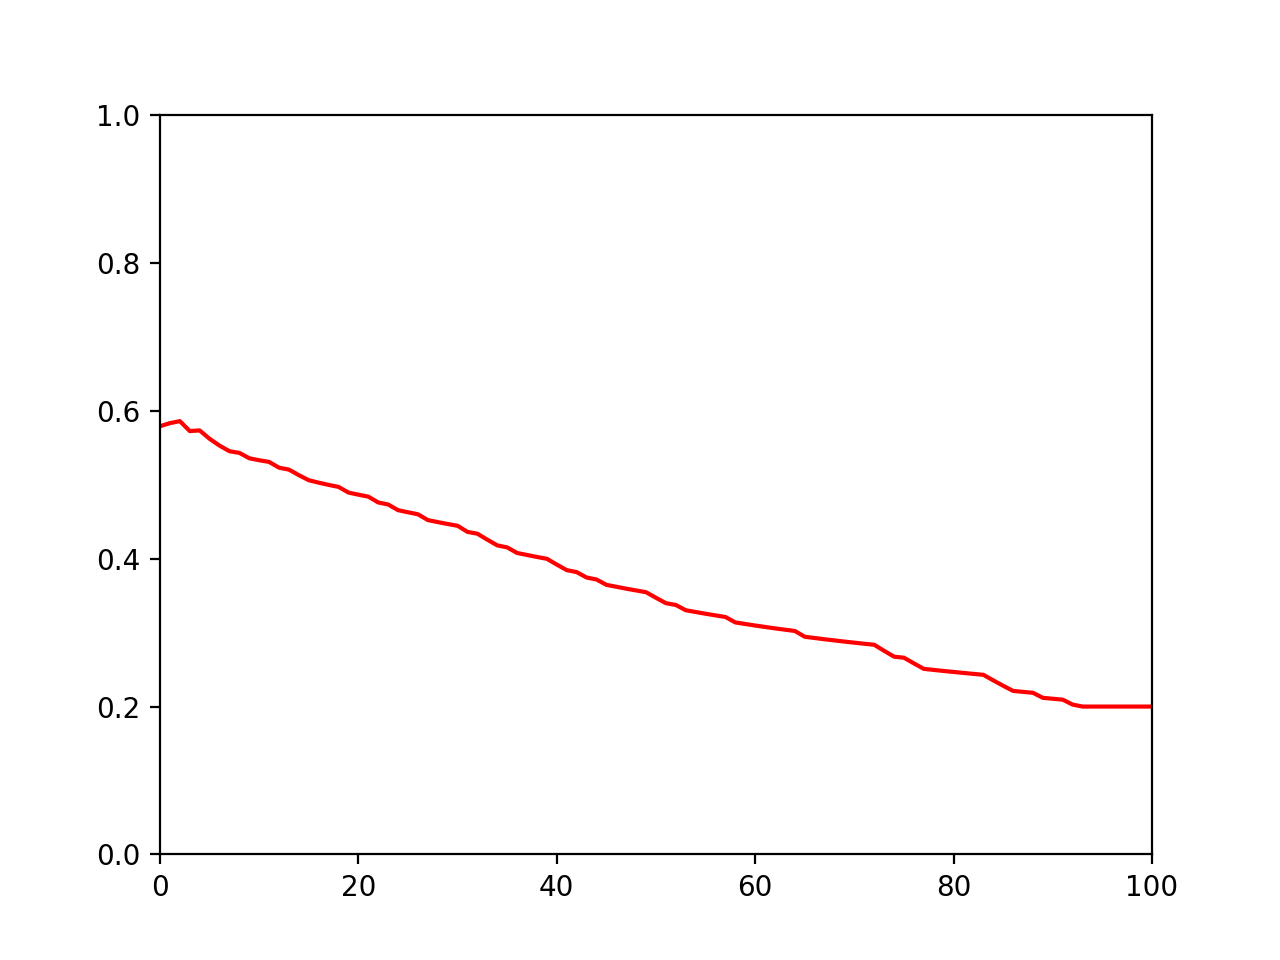

In [15]:
iterate=[]
post=[]
plt.show()
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_xlim(0, 100)
axes.set_ylim(0,1)
line, = axes.plot(iterate, post, 'r-')

alpha_real=np.zeros((3,1))
alpha_real[2]=0
beta_real=np.zeros((2,1))
beta_real[1]=-0.5


for i in range(1000):
    action=toolbox.choose_action(state,1)
    pi=toolbox.return_pi()
    iterate.append(i)
    post.append(pi)
    line.set_xdata(iterate)
    line.set_ydata(post)
    plt.draw()
    plt.pause(1e-17)
    reward=toolbox.reward_model_sampling(state, action, alpha_real, beta_real)
    state_set=[]
    action_set=[]
    reward_set=[]
    state_set.append(state)
    action_set.append(action)
    reward_set.append(reward)
    toolbox.Thompson_sampling(state_set, action_set, reward_set)


In [16]:
pi

0.8